PS: Convolutional Neural Network (CNN) - Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

# CSV Version (Exam pov)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
train = pd.read_csv('/content/fashion-mnist_train.csv')
test = pd.read_csv('/content/fashion-mnist_test.csv')

x_train = train.drop(['label'],axis=1)
y_train = train['label']

x_test = test.drop(['label'],axis=1)
y_test = test['label']

In [ ]:
x_test

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,37,...,32,23,14,20,0,0,1,0,0,0
9996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,0,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,0,1,3,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# Preprocessing the input image data by converting the data type to float32 and normalizing the pixel values to the range [0, 1].
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the input data to the required shape (28, 28, 1)
x_train_reshaped = x_train.values.reshape(-1, 28, 28, 1)
x_test_reshaped = x_test.values.reshape(-1, 28, 28, 1)

pullover


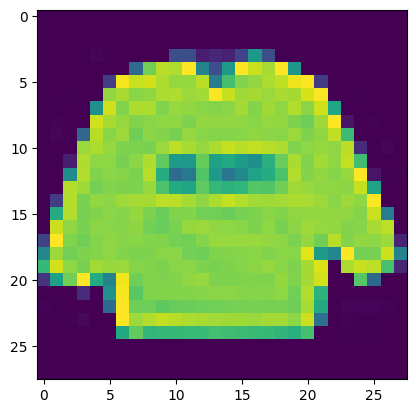

ankle_boots


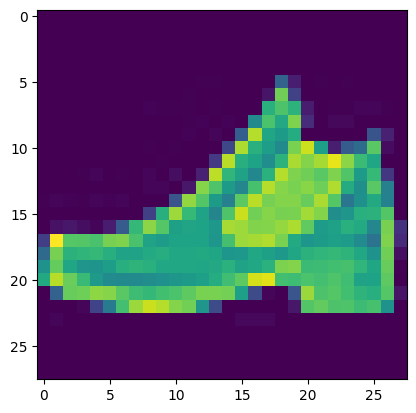

shirt


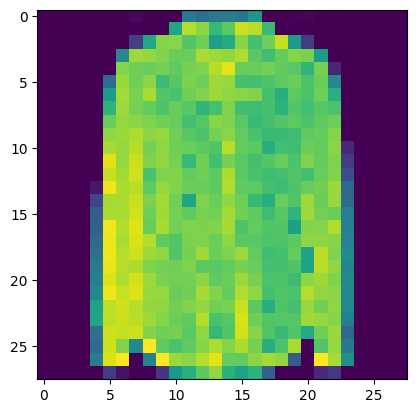

In [ ]:
for i in range(3):
    print(labels[y_train[i]])
    plt.imshow(x_train_reshaped[i])
    plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               1384576   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.fit(x_train_reshaped, y_train, epochs=5, batch_size=32, validation_data=(x_test_reshaped, y_test))

Epoch 1/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.3814 - accuracy: 0.8647 - val_loss: 0.2761 - val_accuracy: 0.9036
Epoch 2/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.2573 - accuracy: 0.9057 - val_loss: 0.2401 - val_accuracy: 0.9121
Epoch 3/5
1875/1875 [==============================] - 67s 36ms/step - loss: 0.2114 - accuracy: 0.9214 - val_loss: 0.2405 - val_accuracy: 0.9138
Epoch 4/5
1875/1875 [==============================] - 72s 38ms/step - loss: 0.1767 - accuracy: 0.9347 - val_loss: 0.2263 - val_accuracy: 0.9207
Epoch 5/5
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1469 - accuracy: 0.9456 - val_loss: 0.2251 - val_accuracy: 0.9230


In [ ]:
loss,acc = model.evaluate(x_test_reshaped,y_test)

313/313 [==============================] - 2s 8ms/step - loss: 0.2251 - accuracy: 0.9230


In [ ]:
labels = ['t-shirt','trouser','pullover','dress','coat','sandal','sneakers','shirt','bag','ankle boots']

In [ ]:
predictions = model.predict(x_test_reshaped[:1])

1/1 [==============================] - 0s 65ms/step


In [ ]:
label = labels[np.argmax(predictions)]

t-shirt


<function matplotlib.pyplot.show(close=None, block=None)>

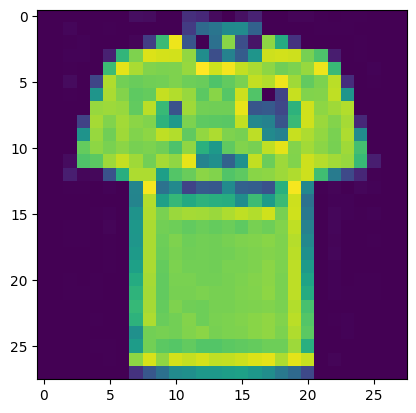

In [ ]:
import matplotlib.pyplot as plt
print(label)

plt.imshow(x_test_reshaped[:1][0])
plt.show

# Keras Dataset version

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
#Load dataset
(train_x, train_y), (test_x, test_y) = fashion_mnist.load_data()

In [ ]:
train_x.shape

(60000, 28, 28)

In [ ]:
len(train_y)

60000

Dataset Visualization Preprocessing

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

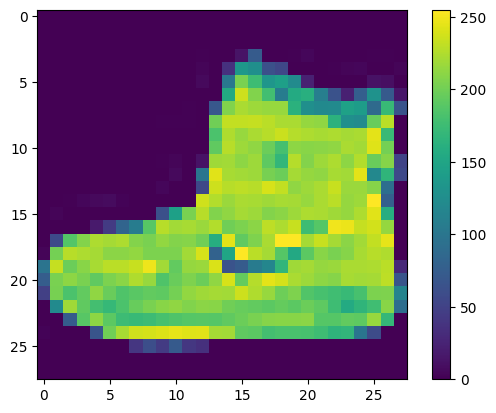

In [ ]:
plt.figure()
plt.imshow(train_x[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# plt.figure(figsize=(10,10))
# for i in range(25):
#     plt.subplot(5,5,i+1)
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
#     plt.imshow(train_x[i], cmap=plt.cm.binary)
#     plt.xlabel(class_names[train_y[i]])
# plt.show()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
# Preprocessing the input image data by converting the data type to float32 and normalizing the pixel values to the range [0, 1].

train_x = train_x.astype('float32') / 255.0
test_x = test_x.astype('float32') / 255.0

Model building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, MaxPooling2D, Conv2D

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu',input_shape=(28, 28, 1)))


Conv2D(...) adds a convolutional layer to the neural network model.

`filters=64` specifies the number of filters or kernels in the convolutional layer. Each filter learns to detect different patterns or features in the input data.

`kernel_size=(3,3)` defines the size of the convolutional kernels. In this case, each kernel is a 3x3 matrix.

 'ReLU' stands for Rectified Linear Unit, which introduces non-linearity into the model.

`input_shape=(28, 28, 1)`:
   - 28,28: Height and width of each input image in pixels.
   - 1: The number of channels in each input image. Here, since Fashion MNIST grayscale images are used, there is only one channel. If it were RGB images, there would be three channels.

In [ ]:
# Adding maxpooling layer to downsample the feature maps, extract dominant features, reduce computational complexity, and improve the generalization capability of the model.
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128, activation = "relu"))
model.add(Dense(10, activation = "softmax"))


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 10816)             0         
                                                                 
 dense (Dense)               (None, 128)               1384576   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1386506 (5.29 MB)
Trainable params: 1386506 (5.29 MB)
Non-trainable params: 0 (0.00 Byte)
________________

In [ ]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(train_x, train_y, epochs = 7, validation_split = 0.2)

Epoch 1/7
1500/1500 [==============================] - 64s 42ms/step - loss: 0.4059 - accuracy: 0.8548 - val_loss: 0.3056 - val_accuracy: 0.8917
Epoch 2/7
1500/1500 [==============================] - 63s 42ms/step - loss: 0.2736 - accuracy: 0.9023 - val_loss: 0.3523 - val_accuracy: 0.8727
Epoch 3/7
1500/1500 [==============================] - 62s 41ms/step - loss: 0.2257 - accuracy: 0.9159 - val_loss: 0.2628 - val_accuracy: 0.9059
Epoch 4/7
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1902 - accuracy: 0.9301 - val_loss: 0.2632 - val_accuracy: 0.9053
Epoch 5/7
1500/1500 [==============================] - 59s 39ms/step - loss: 0.1627 - accuracy: 0.9405 - val_loss: 0.2503 - val_accuracy: 0.9143
Epoch 6/7
1500/1500 [==============================] - 60s 40ms/step - loss: 0.1364 - accuracy: 0.9500 - val_loss: 0.2753 - val_accuracy: 0.9089
Epoch 7/7
1500/1500 [==============================] - 58s 39ms/step - loss: 0.1158 - accuracy: 0.9574 - val_loss: 0.2671 - val_ac

In [ ]:
loss, acc = model.evaluate(test_x, test_y)

313/313 [==============================] - 4s 12ms/step - loss: 0.2756 - accuracy: 0.9123


In [ ]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [ ]:
predictions = model.predict(test_x[:1])

1/1 [==============================] - 0s 70ms/step


In [ ]:
predictions

array([[1.1335134e-07, 4.9590207e-09, 3.4766796e-08, 1.3452674e-10,
        1.3705720e-07, 2.4038329e-05, 4.7808310e-08, 1.9232295e-05,
        4.6747759e-06, 9.9995172e-01]], dtype=float32)

In [ ]:
label = labels[np.argmax(predictions)]

Determines the predicted label for the first test image based on the highest predicted probability among the classes.

np.argmax(predictions) returns the index of the class with the highest redicted probability among the classes. It essentially identifies the class that the model predicts with the highest confidence.
labels[np.argmax(predictions)] then retrieves the corresponding label from the labels list based on the index of the predicted class.

**In short, we're figuring out which class the model thinks is most probable, and then getting its label to interpret the prediction.**

ankle_boots


<function matplotlib.pyplot.show(close=None, block=None)>

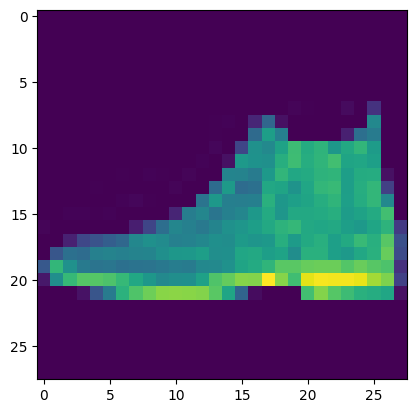

In [ ]:
import matplotlib.pyplot as plt
print(label)
plt.imshow(test_x[:1][0])
plt.show